In [1]:
import pandas as pd
data=pd.read_csv('all_data.csv', parse_dates = ['Issuance Date'], index_col = ['Issuance Date'])
data

,Unnamed: 0,Quantity
Issuance Date,,
2023-03-30,0,29625.0
2023-03-30,1,7500.0
2023-03-24,2,20.0
2023-03-09,3,178.0
2023-03-09,4,1.0
...,...,...
2019-06-24,816,6776.0
2016-04-19,817,31532.0
2011-10-05,818,1336270.0


In [2]:
data.columns

Index(['Unnamed: 0', 'Quantity'], dtype='object')

In [3]:
data = data.drop('Unnamed: 0', axis = 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107832 entries, 2023-03-30 to 2011-01-25
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Quantity  107832 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB


In [5]:
data = data.resample('M').sum()

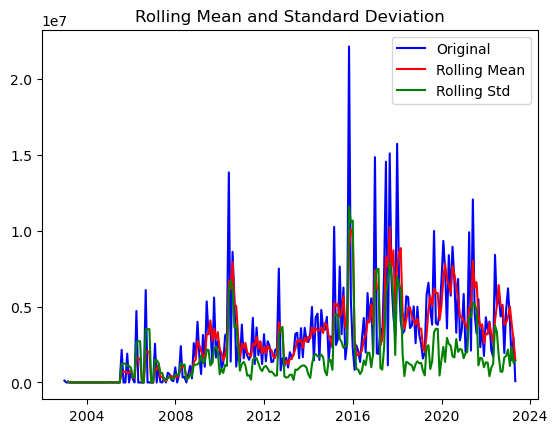

In [6]:
import matplotlib.pyplot as plt

rolling_mean = data['Quantity'].rolling(window=3).mean()
rolling_std = data['Quantity'].rolling(window=3).std()

plt.plot(data['Quantity'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()

In [7]:
data

,Quantity
Issuance Date,
2002-12-31,125000.0
2003-01-31,0.0
2003-02-28,0.0
2003-03-31,0.0
2003-04-30,0.0
...,...
2022-12-31,6201259.0
2023-01-31,4056130.0
2023-02-28,1484600.0


In [8]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data)
adftest[1]

0.2853564254080261

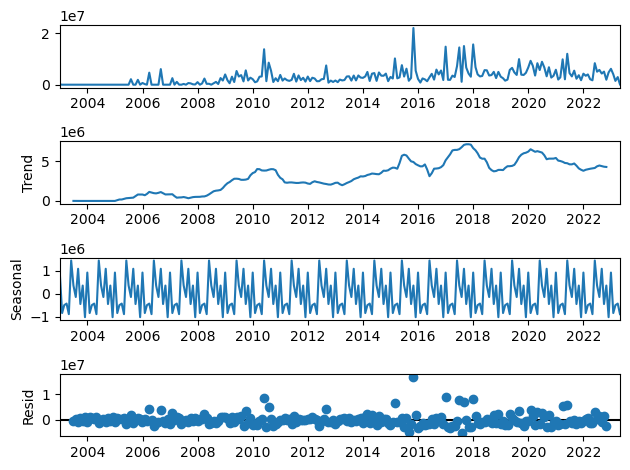

In [9]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data, model = 'additive')
fig = decomposition.plot()
plt.show()

<AxesSubplot: xlabel='Issuance Date'>

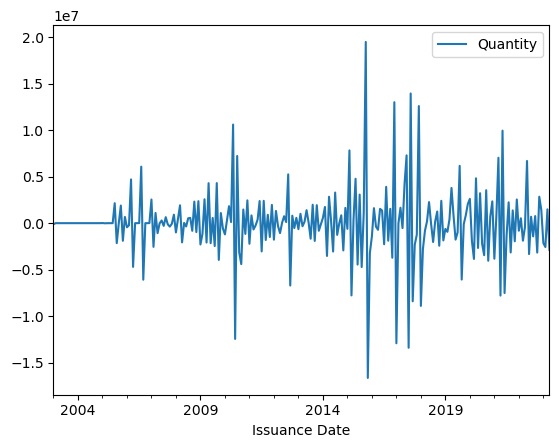

In [10]:
data = data.diff(periods = 1)
data = data.dropna()
data.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data)
adftest[1]

2.38295674330052e-11

In [12]:
train = data.loc[:'2019-02-11',:]
val = data.loc['2019-02-11':,:]
train.shape

(193, 1)

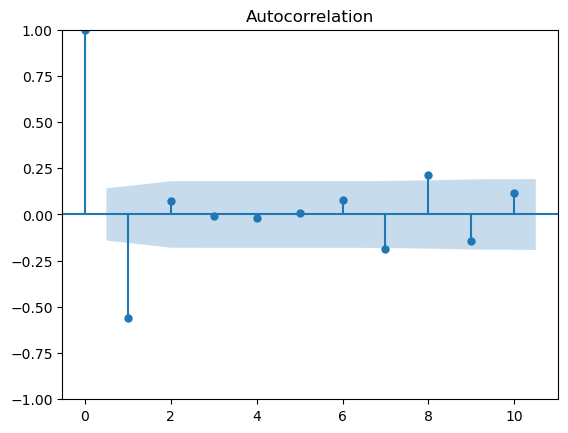

C:\Users\12269\anaconda3\envs\DAB300\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


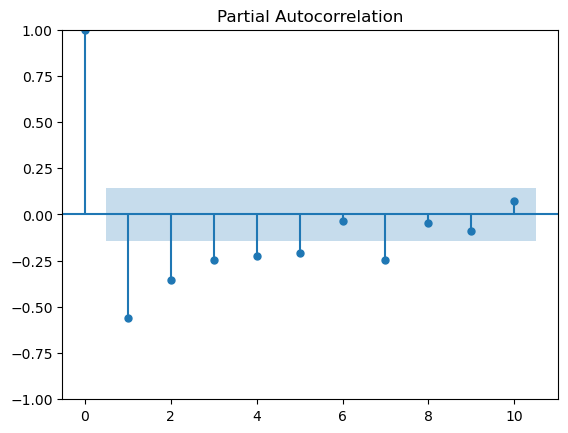

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train, lags=10)
plt.show()

plot_pacf(train, lags=10)
plt.show()

In [14]:
import itertools
p = range(0, 7)
q = range(0,6)
d = range(0,2)
pdq = list(itertools.product(p,d,q))
len(pdq)

84

In [15]:
rmse = []
order = []

In [16]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
import numpy as np
for comb in pdq:
    model = ARIMA(train, order=comb).fit()
    pred = model.predict(start='2019-02-11', end='2023-04-09')
    error = np.sqrt(mean_squared_error(pred, val))
    order.append(comb)
    rmse.append(error)
rmse

[3525607.0975043764,
 3555607.486747097,
 3558113.6085713985,
 3555549.309635289,
 3555757.06438662,
 3555780.7672519395,
 3571638.8112745974,
 3525564.8024385753,
 3558740.9023884404,
 3555750.1189516364,
 3555627.0981136835,
 3552417.6086852984,
 3526036.5923607294,
 3557594.9313914496,
 3556589.645146936,
 3660391.929517775,
 3656685.296564697,
 3579725.5614422187,
 3692700.8257449865,
 3525965.1676598405,
 3556636.5790439933,
 3633907.7171381717,
 3657842.057737304,
 3649547.8628457384,
 3532888.560846085,
 3555661.6460159854,
 3550592.698631169,
 3556963.778262687,
 3652092.1110807,
 3879253.8360565966,
 3563297.1633792194,
 3532789.343650234,
 3557071.7421106608,
 3654246.2991240923,
 3585549.3601331706,
 3803103.372066169,
 3543262.1965518096,
 3555366.167376388,
 3555489.0734840664,
 3568505.780188824,
 3989551.137475623,
 3870617.5303374627,
 3564454.923221676,
 3542413.9790315097,
 3531412.9385829684,
 3558030.007700666,
 3842157.245135346,
 4049671.10059996,
 3540431.3777740

In [17]:
for i in range (len(rmse)):
    if rmse[i] == min(rmse):
        print (i)

57


In [18]:
order[77]

(6, 0, 5)

In [19]:
val

,Quantity
Issuance Date,
2019-02-28,-934454.0
2019-03-31,395515.0
2019-04-30,3789586.0
2019-05-31,808615.0
2019-06-30,-1771353.0
2019-07-31,-989999.0
2019-08-31,6169189.0
2019-09-30,-6070623.0
2019-10-31,-115755.0


In [20]:
model = ARIMA(data, order=(6,0,5))
results = model.fit()

predictions = results.predict(start='2019-02-28', end='2023-04-30')
print(predictions)
print (len(predictions))

Issuance Date
2019-02-28    1.274919e+06
2019-03-31    4.118177e+06
2019-04-30    6.306066e+05
2019-05-31   -4.449214e+05
2019-06-30   -3.922867e+06
2019-07-31    8.191578e+05
2019-08-31    5.891432e+04
2019-09-30   -4.324320e+06
2019-10-31    1.702555e+06
2019-11-30    1.286382e+06
2019-12-31    1.044463e+06
2020-01-31   -3.148840e+06
2020-02-29   -2.976552e+06
2020-03-31   -4.020954e+06
2020-04-30    3.867710e+06
2020-05-31   -4.212094e+06
2020-06-30    1.999068e+06
2020-07-31   -3.657806e+06
2020-08-31   -1.534776e+05
2020-09-30    2.335369e+06
2020-10-31   -1.631860e+06
2020-11-30    3.208509e+06
2020-12-31    1.136582e+06
2021-01-31    2.852611e+05
2021-02-28    1.992056e+06
2021-03-31    3.173583e+06
2021-04-30   -6.457962e+06
2021-05-31    4.035703e+06
2021-06-30   -7.539741e+06
2021-07-31    1.651424e+06
2021-08-31    2.777945e+06
2021-09-30    2.615816e+05
2021-10-31    3.279194e+06
2021-11-30    1.278988e+06
2021-12-31    2.312350e+06
2022-01-31   -2.165529e+05
2022-02-28    

In [21]:
np.sqrt(mean_squared_error(predictions, val))

2511889.907521917

In [22]:
val.mean(), np.sqrt(val.var())

(Quantity   -47520.686275
 dtype: float64,
 Quantity    3.560175e+06
 dtype: float64)

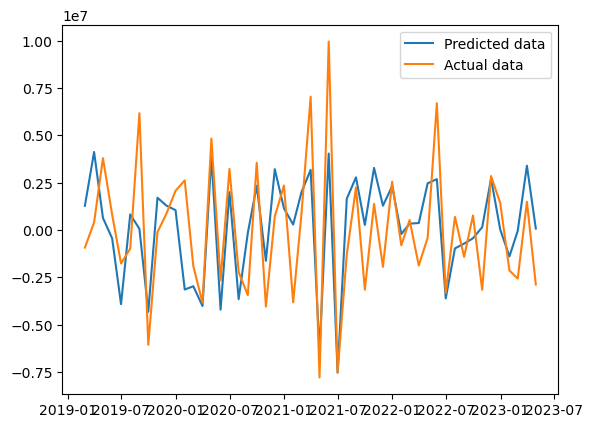

In [23]:
import matplotlib.pyplot as plt
plt.plot(predictions, label = 'Predicted data')
plt.plot(val, label = 'Actual data')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(val, predictions)
r2 = r2_score(val, predictions)
print (mae)
r2

2032174.2167659514


0.49223973451378045

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data, order=(5, 0, 5), seasonal_order=(0, 1, 1, 12))
results = model.fit()

predictions = results.predict(start='2019-02-28', end='2023-04-30')
print(predictions)
print (len(predictions))

Issuance Date
2019-02-28    7.930395e+05
2019-03-31    3.585792e+06
2019-04-30   -2.121608e+05
2019-05-31    1.498851e+06
2019-06-30   -2.639734e+06
2019-07-31    9.944081e+05
2019-08-31    1.585371e+06
2019-09-30   -4.747488e+06
2019-10-31    2.265465e+06
2019-11-30   -1.769525e+05
2019-12-31    2.877553e+06
2020-01-31   -4.535633e+06
2020-02-29   -3.083183e+06
2020-03-31   -4.861279e+06
2020-04-30    3.250657e+06
2020-05-31   -2.481476e+06
2020-06-30    2.020784e+06
2020-07-31   -3.648579e+06
2020-08-31    1.318848e+06
2020-09-30    2.573312e+06
2020-10-31   -6.416223e+05
2020-11-30    2.544950e+06
2020-12-31    2.666290e+06
2021-01-31    2.057188e+05
2021-02-28    1.556274e+06
2021-03-31    2.671158e+06
2021-04-30   -6.136929e+06
2021-05-31    5.476843e+06
2021-06-30   -5.688465e+06
2021-07-31    1.375253e+06
2021-08-31    3.720953e+06
2021-09-30   -4.374771e+04
2021-10-31    2.950278e+06
2021-11-30    3.176541e+05
2021-12-31    4.179115e+06
2022-01-31   -5.073956e+05
2022-02-28    

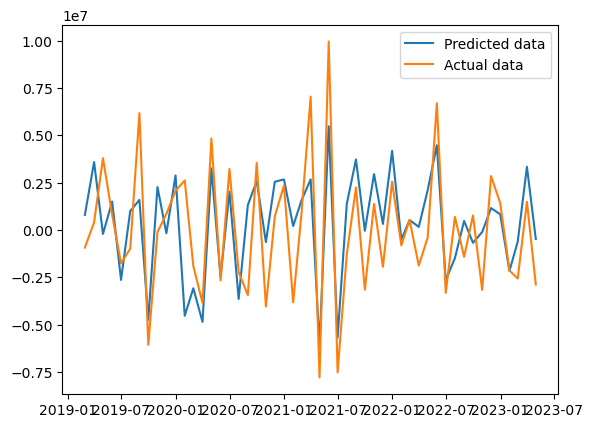

In [53]:
import matplotlib.pyplot as plt
plt.plot(predictions, label = 'Predicted data')
plt.plot(val, label = 'Actual data')
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(val, predictions)
r2 = r2_score(val, predictions)
mae
print (r2)

0.5171626944557146


In [55]:
np.sqrt(mean_squared_error(predictions, val))

2449467.342725516